# JSON 데이터 타입의 공공데이터 상관 분석 실습

In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rc, font_manager

In [79]:
# 한글 표기 설정
from matplotlib import rc, font_manager
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)

In [73]:
#축에 마이너스 표기
plt.rcParams['axes.unicode_minus']=False

#그래프 사이즈 설정
plt.rcParams['figure.figsize']=(6,4)

sns.set(style='whitegrid')

### JSON 

In [10]:
tpFileName='data/서울특별시_관광지입장정보_2011_2016.json'
jsonTP=json.loads(open(tpFileName, 'r', encoding='utf-8').read())
jsonTP

[{'ForNum': 14137,
  'NatNum': 43677,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '창덕궁',
  'rnum': 1,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 0,
  'NatNum': 6523,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '운현궁',
  'rnum': 2,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 40224,
  'NatNum': 141183,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '경복궁',
  'rnum': 3,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 697,
  'NatNum': 17644,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '창경궁',
  'rnum': 4,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 6837,
  'NatNum': 11486,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '종묘',
  'rnum': 5,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 0,
  'NatNum': 260272,
  'addrCd': 1117,
  'gungu': '용산구',
  'resNm': '국립중앙박물관',
  'rnum': 6,
  'sido': '서울특별시',
  'yyyymm': '201101'},
 {'ForNum': 0,
  'NatNum': 57787,
  'addrCd': 1111,
  'gungu': '종로구',
  'resNm': '서울역사박물관',
  'rnum': 7,
  'sido': '서울특별시',
 

### 데이터프레임으로 만들기  

In [12]:
tour_table=pd.DataFrame(jsonTP,columns=('yyyymm','resNm','ForNum'))
tour_table                     

,yyyymm,resNm,ForNum
0,201101,창덕궁,14137
1,201101,운현궁,0
2,201101,경복궁,40224
3,201101,창경궁,697
4,201101,종묘,6837
...,...,...,...
889,201609,국립중앙박물관,12218
890,201609,덕수궁,25843
891,201609,서대문자연사박물관,0
892,201609,트릭아이미술관,13677


### 인덱스 설정

In [16]:
tour_table=tour_table.set_index('yyyymm')
tour_table

,resNm,ForNum
yyyymm,,
201101,창덕궁,14137
201101,운현궁,0
201101,경복궁,40224
201101,창경궁,697
201101,종묘,6837
...,...,...
201609,국립중앙박물관,12218
201609,덕수궁,25843
201609,서대문자연사박물관,0


In [43]:
resNm=tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [20]:
fv_cFileName='data/중국(112)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_cFileName,'r',encoding='utf-8').read())
jsonFV

[{'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 91252, 'yyyymm': '201101'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 140571, 'yyyymm': '201102'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 141457, 'yyyymm': '201103'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 147680, 'yyyymm': '201104'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 154066, 'yyyymm': '201105'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 150119, 'yyyymm': '201106'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 195188, 'yyyymm': '201107'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 241987, 'yyyymm': '201108'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 176196, 'yyyymm': '201109'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 181428, 'yyyymm': '201110'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 136152, 'yyyymm': '201111'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 119061, 'yyyymm': '201112'},
 {'nat_cd': '112', 'nat_name': '중국', 'visit_cnt': 113

In [27]:
china_table=pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
china_table

,yyyymm,visit_cnt
0,201101,209184
1,201102,230362
2,201103,306126
3,201104,239075
4,201105,241695
...,...,...
67,201608,148632
68,201609,157313
69,201610,180348
70,201611,164685


In [28]:
china_table=china_table.rename(columns={'visit_cnt':'china'})
china_table=china_table.set_index('yyyymm')
china_table

,china
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [31]:
fv_jFileName='data/일본(130)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_jFileName,'r',encoding='utf-8').read())
print(jsonFV)
japan_table=pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
print(japan_table)
japan_table=japan_table.rename(columns={'visit_cnt':'japan'})
japan_table=japan_table.set_index('yyyymm')
japan_table

[{'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 209184, 'yyyymm': '201101'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 230362, 'yyyymm': '201102'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 306126, 'yyyymm': '201103'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 239075, 'yyyymm': '201104'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 241695, 'yyyymm': '201105'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 231718, 'yyyymm': '201106'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 227541, 'yyyymm': '201107'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 262157, 'yyyymm': '201108'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 267886, 'yyyymm': '201109'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 302570, 'yyyymm': '201110'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 274889, 'yyyymm': '201111'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 229806, 'yyyymm': '201112'}, {'nat_cd': '130', 'nat_name': '일본', 'visit_cnt': 196301, 'yyyym

,japan
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [33]:
fv_uFileName='data/미국(275)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_uFileName,'r',encoding='utf-8').read())
print(jsonFV)
usa_table=pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
print(usa_table)
usa_table=usa_table.rename(columns={'visit_cnt':'usa'})
usa_table=usa_table.set_index('yyyymm')
usa_table

[{'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 43065, 'yyyymm': '201101'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 41077, 'yyyymm': '201102'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 54610, 'yyyymm': '201103'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 59616, 'yyyymm': '201104'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 59780, 'yyyymm': '201105'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 64412, 'yyyymm': '201106'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 59443, 'yyyymm': '201107'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 56377, 'yyyymm': '201108'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 56304, 'yyyymm': '201109'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 63956, 'yyyymm': '201110'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 49082, 'yyyymm': '201111'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 45167, 'yyyymm': '201112'}, {'nat_cd': '275', 'nat_name': '미국', 'visit_cnt': 44152, 'yyyymm': '201201'}

,usa
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
...,...
201608,63522
201609,63793
201610,77878


In [34]:
fv_table=pd.merge(china_table, japan_table, left_index=True, right_index=True)

In [35]:
fv_table=pd.merge(fv_table, usa_table, left_index=True, right_index=True)

In [36]:
fv_table

,china,japan,usa
yyyymm,,,
201101,209184,209184,43065
201102,230362,230362,41077
201103,306126,306126,54610
201104,239075,239075,59616
201105,241695,241695,59780
...,...,...,...
201608,148632,148632,63522
201609,157313,157313,63793
201610,180348,180348,77878


In [83]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    tour=tour_table[tour_table['resNm']==tourpoint]
    merge_table=pd.merge(tour, fv_table, left_index=True, right_index=True)
    # print(merge_table)

    fig=plt.figure()
    fig.suptitle(tourpoint+" 상관관계 분석")
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자수')
    plt.ylabel('외국인 입장객수')
    r1=merge_table.china.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r1))            
    # '%.3f %.2f'%(a,b)  와 같은 형태 
    # '{순서:.2f}  {:}'.format(a,b)
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자수')
    plt.ylabel('외국인 입장객수')
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r2))            
    # '%.3f %.2f'%(a,b)  와 같은 형태 
    # '{순서:.2f}  {:}'.format(a,b)
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자수')
    plt.ylabel('외국인 입장객수')
    r3=merge_table.usa.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r3))            
    # '%.3f %.2f'%(a,b)  와 같은 형태 
    # '{순서:.2f}  {:}'.format(a,b)
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.tight_layout()

    plt.show()
    return [tour_table, r1, r2, r3]

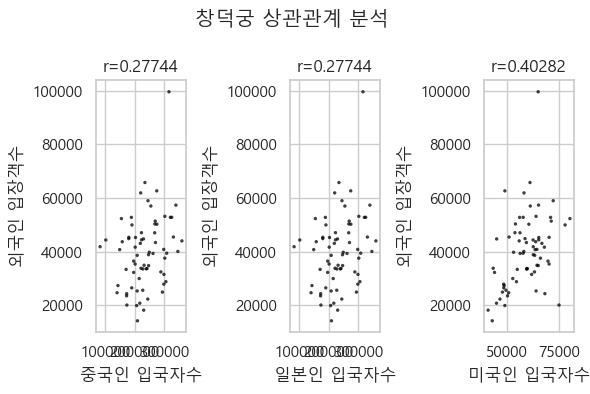

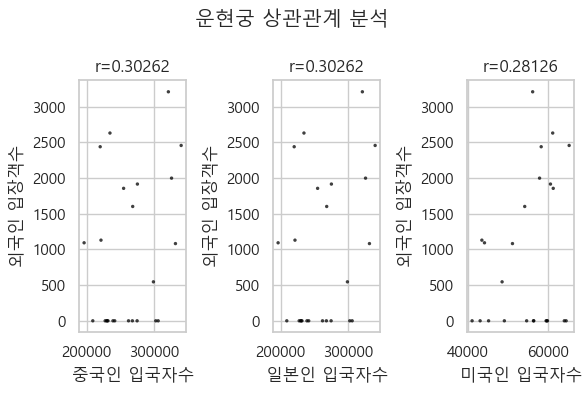

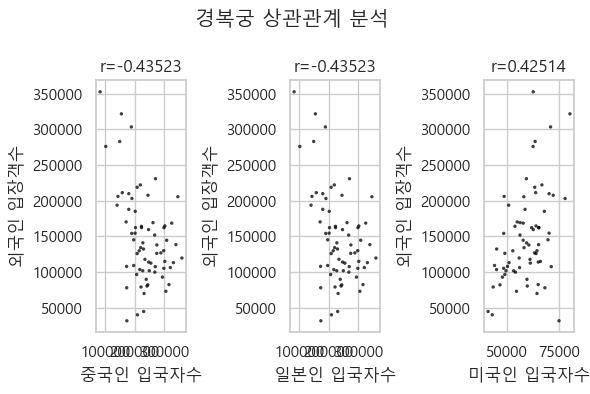

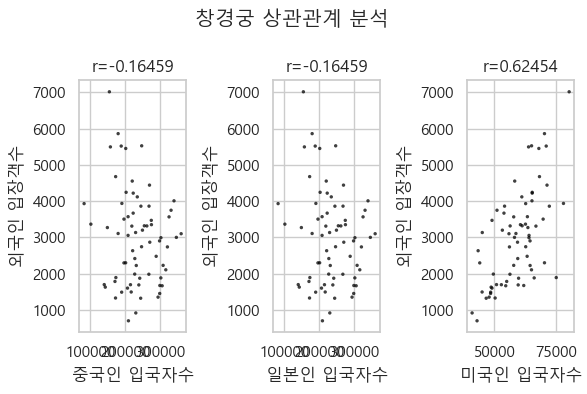

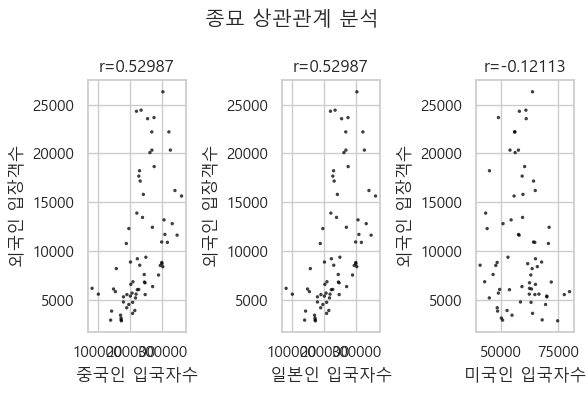

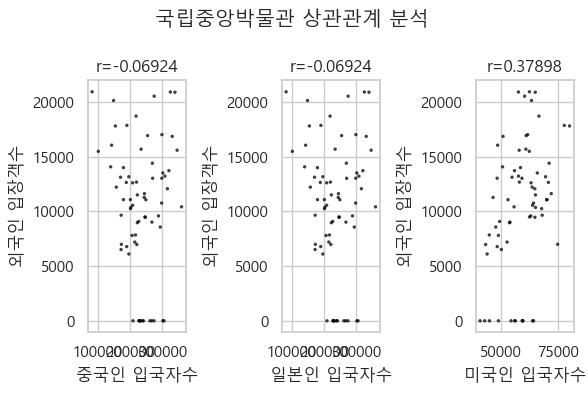

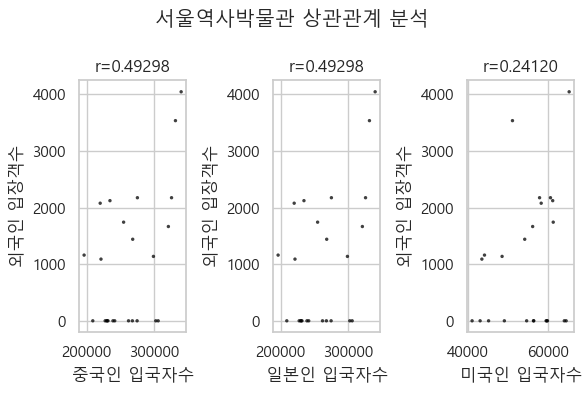

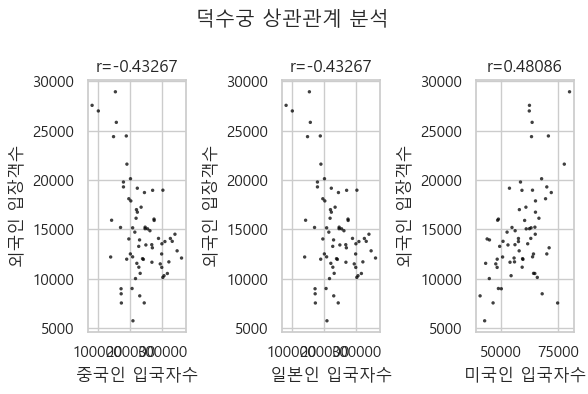

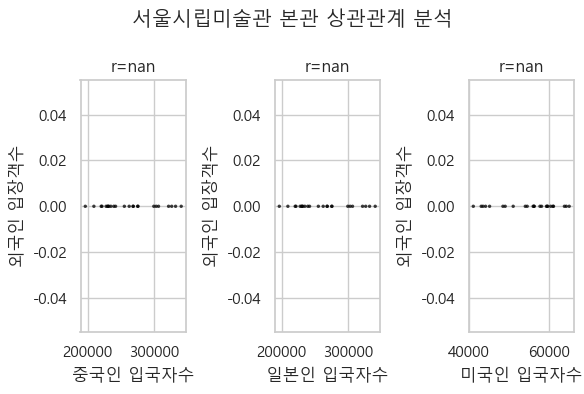

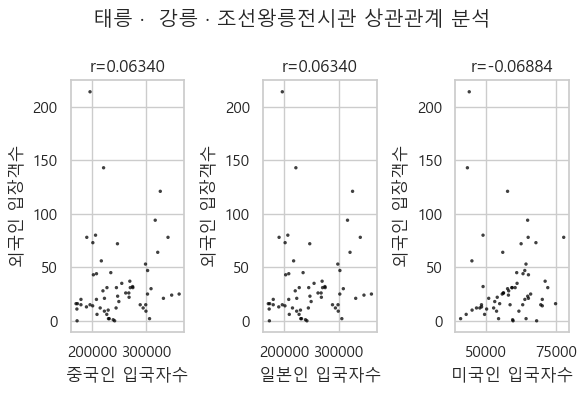

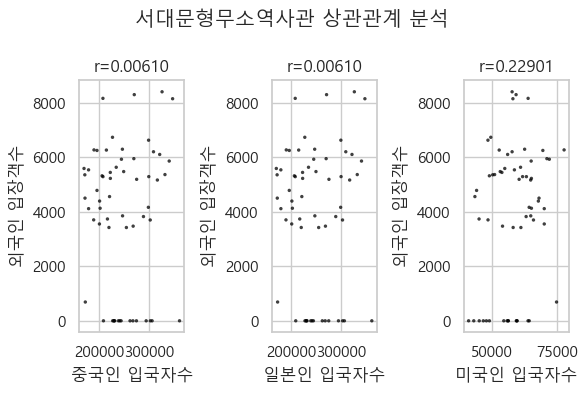

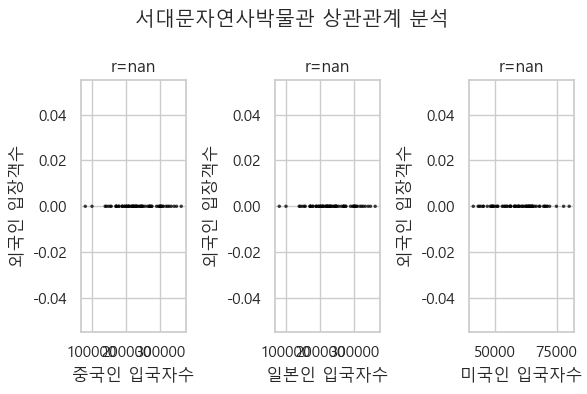

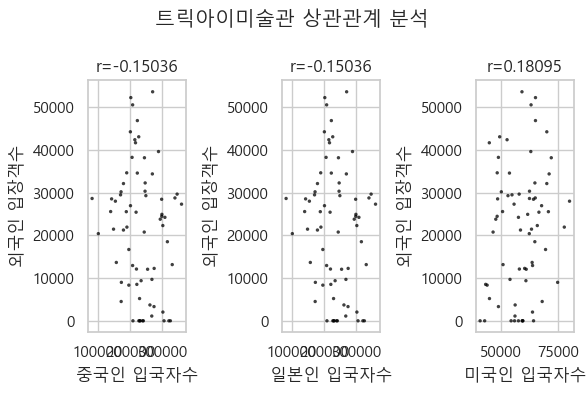

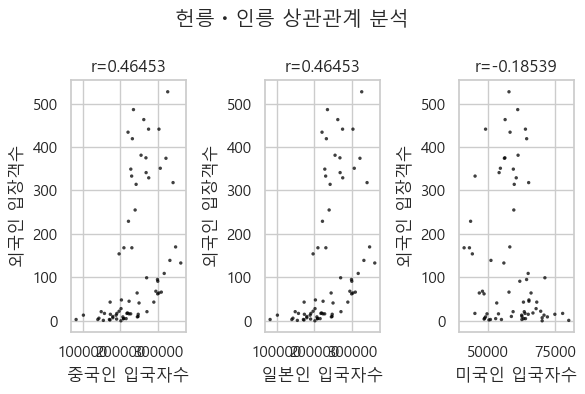

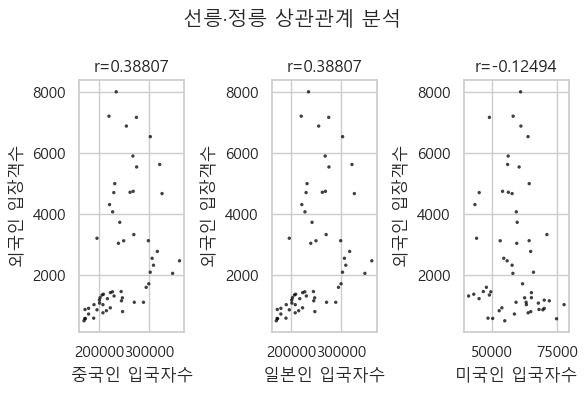

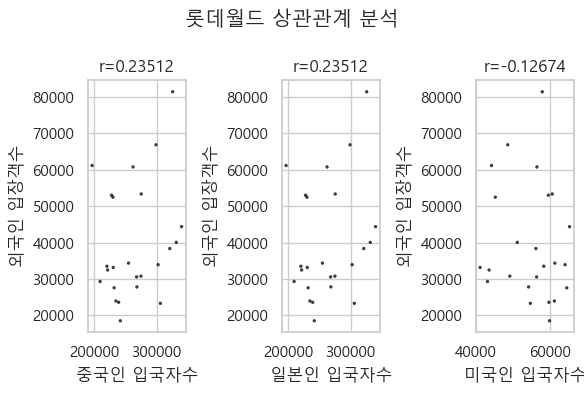

[[            resNm  ForNum
  yyyymm                   
  201101        창덕궁   14137
  201101        운현궁       0
  201101        경복궁   40224
  201101        창경궁     697
  201101         종묘    6837
  ...           ...     ...
  201609    국립중앙박물관   12218
  201609        덕수궁   25843
  201609  서대문자연사박물관       0
  201609    트릭아이미술관   13677
  201609      헌릉ㆍ인릉      17
  
  [894 rows x 2 columns],
  0.2774443570141011,
  0.2774443570141011,
  0.4028160633050156],
 [            resNm  ForNum
  yyyymm                   
  201101        창덕궁   14137
  201101        운현궁       0
  201101        경복궁   40224
  201101        창경궁     697
  201101         종묘    6837
  ...           ...     ...
  201609    국립중앙박물관   12218
  201609        덕수궁   25843
  201609  서대문자연사박물관       0
  201609    트릭아이미술관   13677
  201609      헌릉ㆍ인릉      17
  
  [894 rows x 2 columns],
  0.30261521828798604,
  0.30261521828798604,
  0.2812576500158649],
 [            resNm  ForNum
  yyyymm                   
  201101        창덕궁   

In [84]:
r_list=[]
for tourpoint in resNm:
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

r_list

In [ ]:
r_table=pd.DataFrame(r_list, columns=('tourpoint','china','japan','usa'))
r_table